In [1]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt
import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import scipy as sp
import PlaceCellAnalysis as pc


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]

G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!


In [72]:
mouse = '4222153.2'
df_mouse = df[df['MouseName'].str.match(mouse)]
sess = df_mouse.iloc[-1]
print(sess)


MouseName                                                4222153.2
DateFolder                                              18_04_2019
SessionNumber                                                    3
Track                                            TwoTower_foraging
RewardCount                                                     70
Imaging                                                          1
ImagingRegion                                                  CA1
DateTime                                       2019-04-18 00:00:00
data file        G:\My Drive\VR_Data\TwoTower\4222153.2\18_04_2...
scanfile                                                      None
scanmat          G:\My Drive\2P_Data\TwoTower\4222153.2\18_04_2...
s2pfolder        G:\My Drive\2P_Data\TwoTower\4222153.2\18_04_2...
Name: 1833, dtype: object


In [73]:
VRDat, C, S, A = pp.load_scan_sess(sess,fneu_coeff=0.7)
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)

S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values,
                                                                          bin_size=10,speed=VRDat['speed']._values)

effMorph = trial_info['morphs']+trial_info['bckgndJitter']+trial_info['wallJitter']+trial_info['towerJitter']
effMorph = (effMorph+.3)/1.6
msort = np.argsort(effMorph)

num aberrant ttls 0.0
37344 (37344,) (37344, 21) 121463
frame diff 0


In [74]:
print(S_trial_mat.shape)

(85, 45, 1951)


In [75]:
S_tm_sort = sp.ndimage.filters.gaussian_filter1d(S_trial_mat[msort,:,:],2,axis=1)


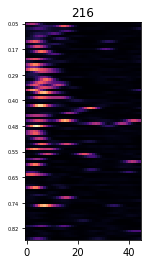

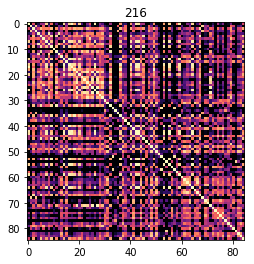

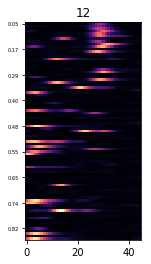

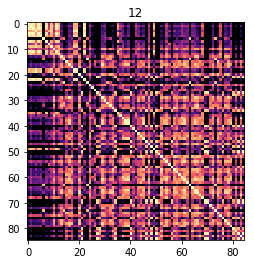

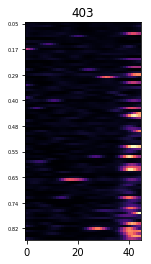

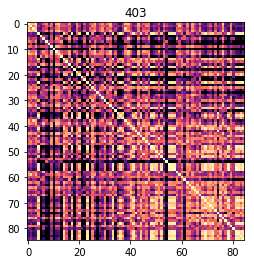

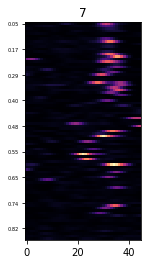

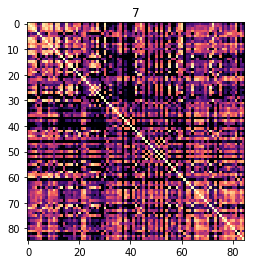

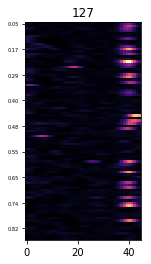

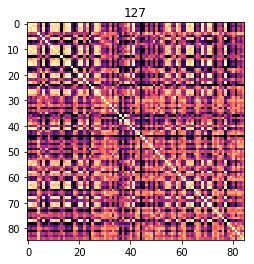

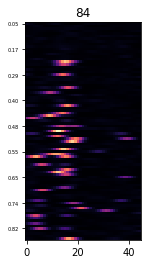

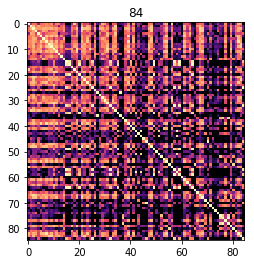

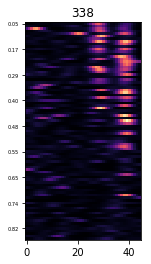

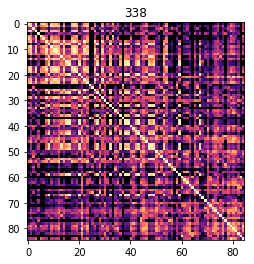

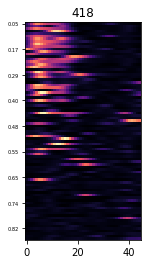

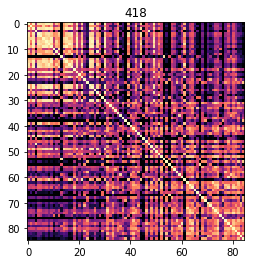

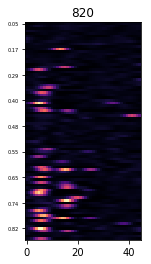

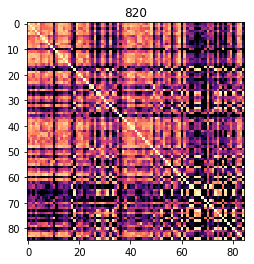

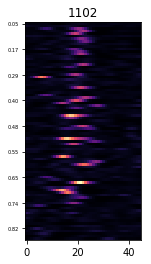

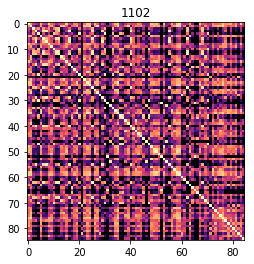

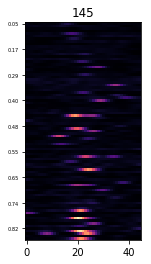

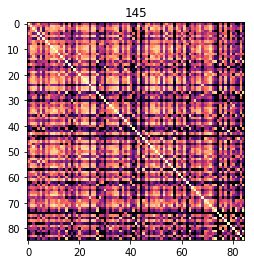

In [80]:
cells = [216,12,403,7,127,84,338,418,820,1102,145]
for cell in cells:
    f,ax = plt.subplots()
    ax.imshow(S_tm_sort[:,:,cell],cmap='magma')
    tick_inds = np.arange(0,S_trial_mat.shape[0],10)
    morph_s = effMorph[msort]
    tick_labels = ["%.2f" % morph_s[i] for i in tick_inds]
    ax.set_yticks(tick_inds)
    ax.set_yticklabels(tick_labels,fontsize=5)
    ax.set_title("%i" % cell)
    f.savefig("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers\\Figures\\ExamplePlaceCells\\4222153.2_18_04_2019_%i.pdf" % cell,format='pdf')
    
    
    _s_tm  = np.squeeze(S_tm_sort[:,:,cell])
    _s_tm = _s_tm/np.linalg.norm(_s_tm,ord=2,axis=1)[:,np.newaxis]
    _sim = np.matmul(_s_tm,_s_tm.T)
    f,ax = plt.subplots()
    ax.imshow(_sim,cmap='cividis',vmin=0.3,vmax=1)
    ax.set_title("%i" % cell)
    f.savefig("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers\\Figures\\ExamplePlaceCells\\4222153.2_18_04_2019_sm_%i.pdf" % cell,format='pdf')

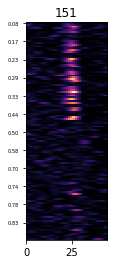

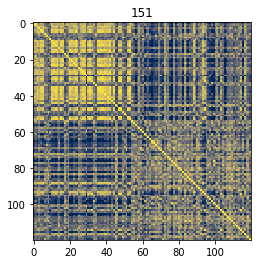

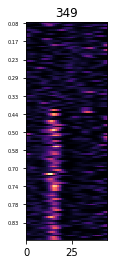

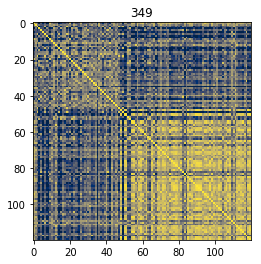

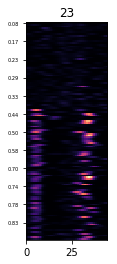

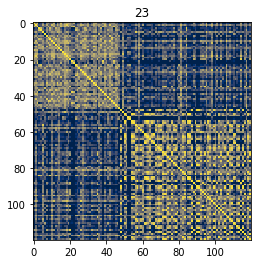

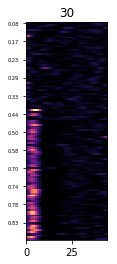

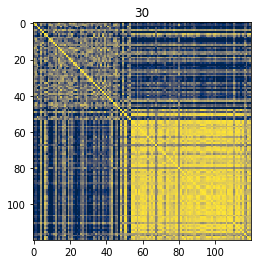

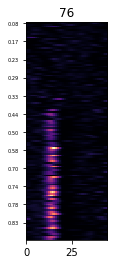

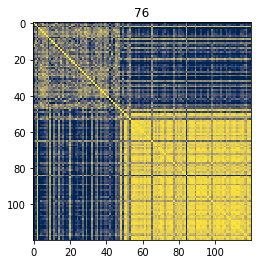

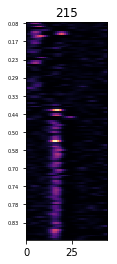

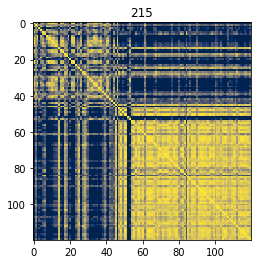

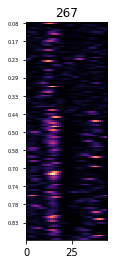

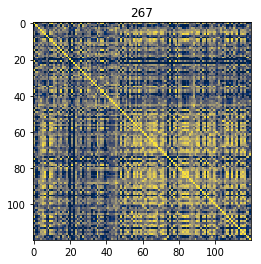

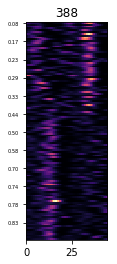

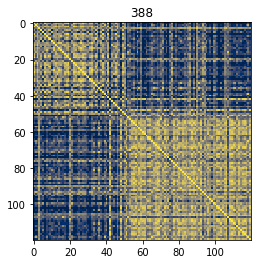

In [71]:
cells = [151,349,23,30,76,215,267,388]
for cell in cells:
    f,ax = plt.subplots()
    ax.imshow(S_tm_sort[:,:,cell],cmap='magma')
    tick_inds = np.arange(0,S_trial_mat.shape[0],10)
    morph_s = effMorph[msort]
    tick_labels = ["%.2f" % morph_s[i] for i in tick_inds]
    ax.set_yticks(tick_inds)
    ax.set_yticklabels(tick_labels,fontsize=5)
    ax.set_title("%i" % cell)
    f.savefig("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers\\Figures\\ExamplePlaceCells\\4139265.5_24_02_2019_%i.pdf" % cell,format='pdf')
    
    
    
    _s_tm  = np.squeeze(S_tm_sort[:,:,cell])
    _s_tm = _s_tm/np.linalg.norm(_s_tm,ord=2,axis=1)[:,np.newaxis]
    _sim = np.matmul(_s_tm,_s_tm.T)
    f,ax = plt.subplots()
    ax.imshow(_sim,cmap='cividis',vmin=0.3,vmax=1)
    ax.set_title("%i" % cell)
    f.savefig("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers\\Figures\\ExamplePlaceCells\\4139265.5_24_02_2019_sm_%i.pdf" % cell,format='pdf')